# Image Morphological Operations

Morphological operations are sets of __Kernels__ that can achieve a variety of effects.

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Utils

def load_img():
    blank_img = np.zeros((600,600))
    font = cv.FONT_HERSHEY_COMPLEX
    text = "BLANK"
    cv.putText(blank_img, text, org=(50,300), fontFace=font, fontScale=5, color=(255,255,255),thickness=15)
    return blank_img

def show_img(img, cmap="gray"):
    fig = plt.figure(figsize=(15,15))
    subplot = fig.add_subplot(111)
    subplot.imshow(img, cmap=cmap)

## Default Image

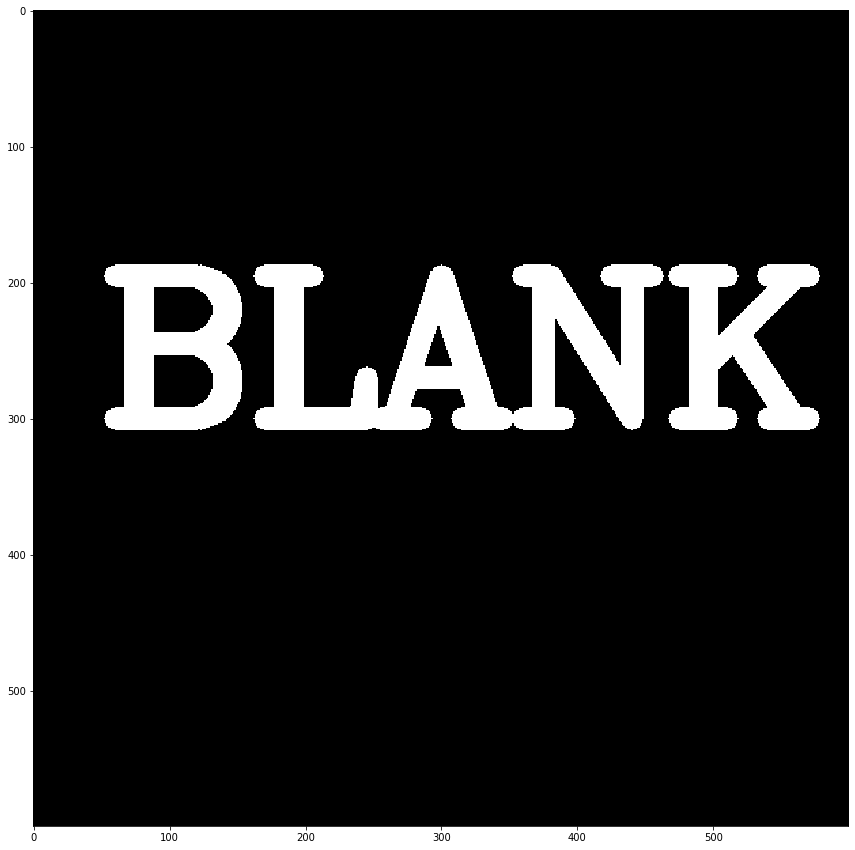

In [37]:
show_img(load_img())

## Erosion Kernel

In [50]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

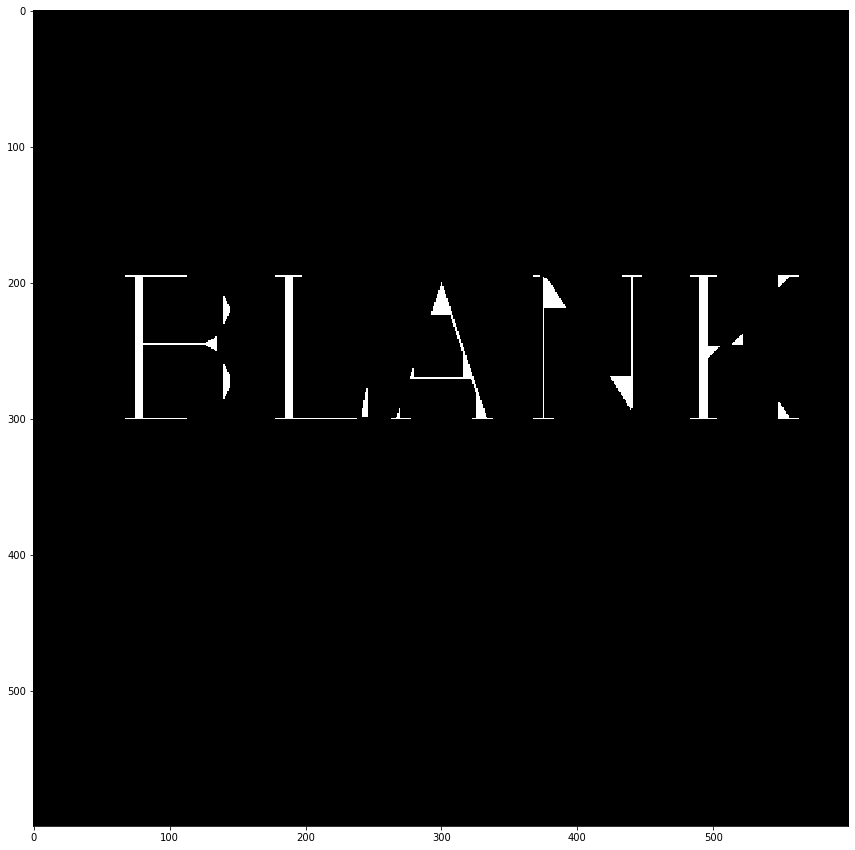

In [51]:
erode_img = cv.erode(load_img(), kernel, iterations=4)
show_img(erode_img)

## Opening & Closing Kernel

### Background noise (Opening)

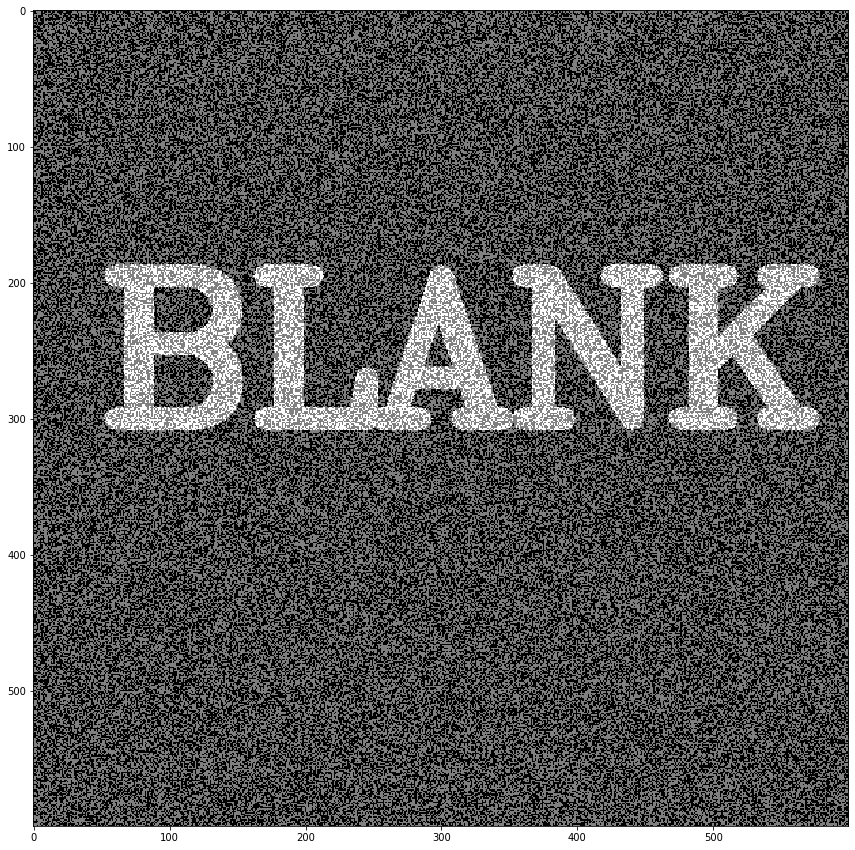

In [70]:
white_noise = np.random.randint(0, 2, (600,600))
white_noise = white_noise * 255
background_noise_img = white_noise + load_img()
show_img(background_noise_img)

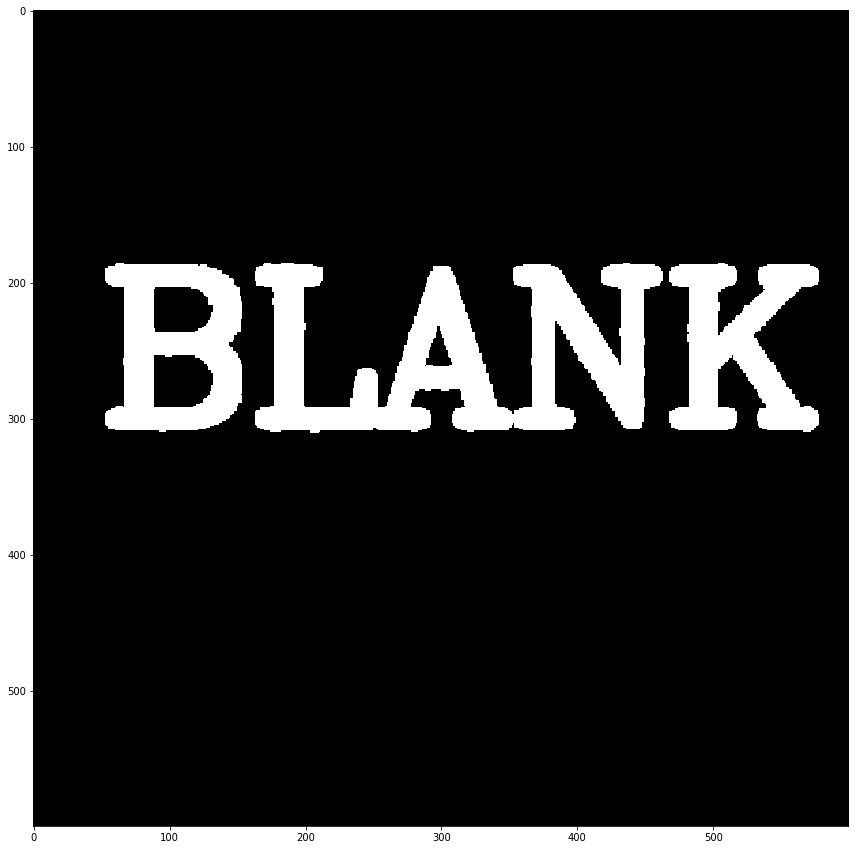

In [71]:
kernel = np.ones((5,5), dtype=np.uint8) # Reusing the erosion kernel
opening_img = cv.morphologyEx(background_noise_img, cv.MORPH_OPEN, kernel)
show_img(opening_img)

### foreground noise (Closing)

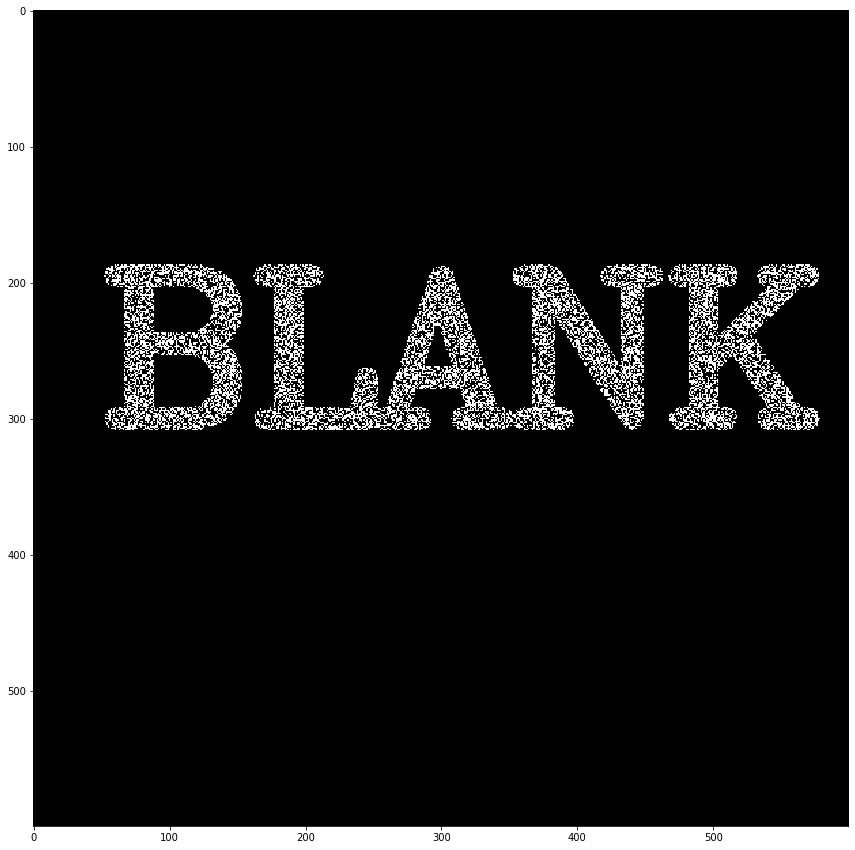

In [72]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise = black_noise * -255
foreground_noise_img = load_img() + black_noise
foreground_noise_img[foreground_noise_img==-255] = 0
show_img(foreground_noise_img)

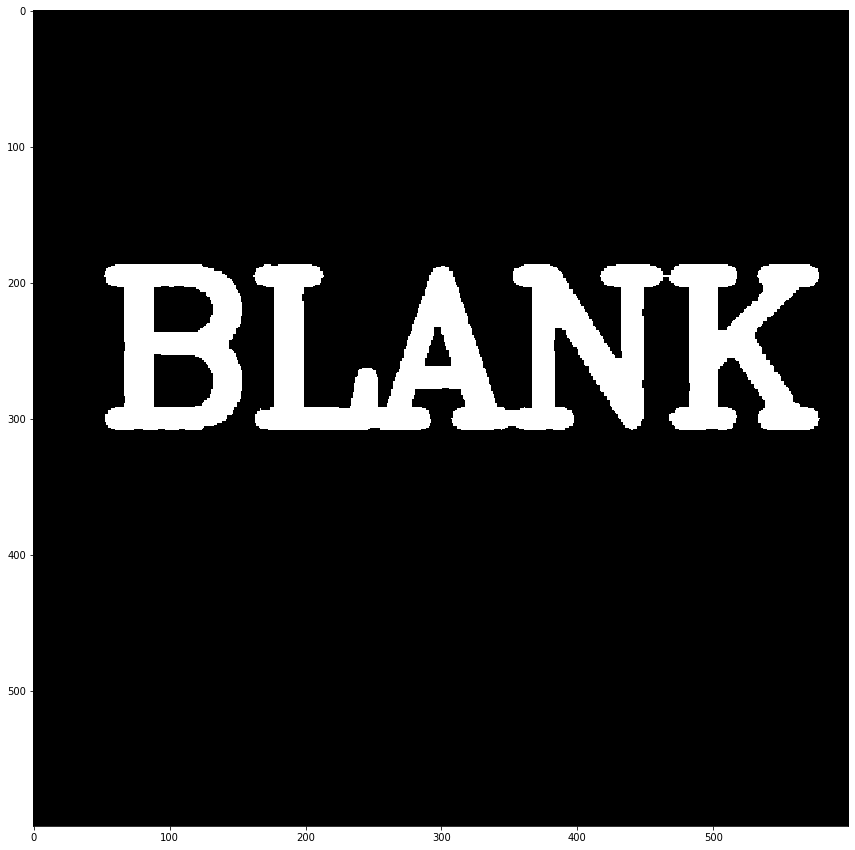

In [73]:
kernel = np.ones((5,5), dtype=np.uint8) # Reusing the erosion kernel
closing_img = cv.morphologyEx(foreground_noise_img, cv.MORPH_CLOSE, kernel)
show_img(closing_img)

## Gradient Kernel

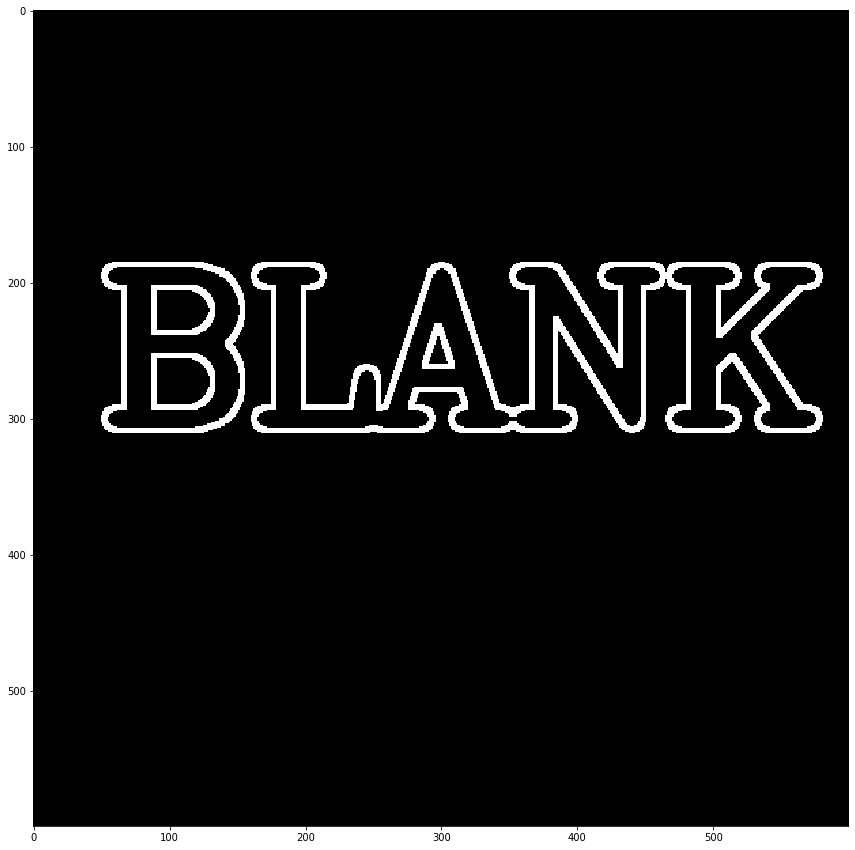

In [74]:
kernel = np.ones((5,5), dtype=np.uint8) # Reusing the erosion kernel
gradient_img = cv.morphologyEx(load_img(), cv.MORPH_GRADIENT, kernel)
show_img(gradient_img)